![Money](https://media.giphy.com/media/qi8Yhj4pKcIec/giphy.gif "They Don't Play for Free...")

### EDA on Salaries.csv
* Also from [SeanLahman.com](http://www.seanlahman.com/baseball-archive/statistics/)
* Player salaries 1985 to 2016

In [1]:
cd ..

/Users/johnphillips/Desktop/DSI-Class-Stuff/BaseBall


In [2]:
%matplotlib inline

In [3]:
%run __init__.py

In [4]:
## New Salaries dataset from Sean Lahman
salaries = pd.read_csv('data/Salaries.csv', delimiter=',')

In [5]:
salaries.head(5)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [6]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


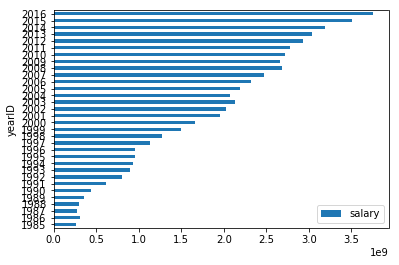

In [7]:
## Sum per season:
salaries.groupby("yearID").sum().plot(kind="barh")

## Salaries have increased tremendously since 1985 ...

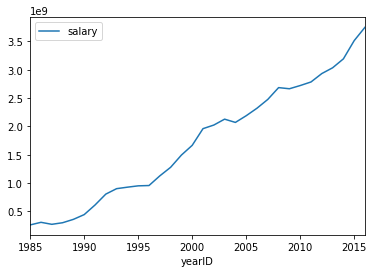

In [8]:
## Sum per season:
salaries.groupby("yearID").sum().plot()

### Salaries have increased tremendously since 1985 ...

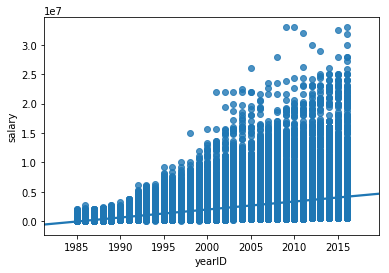

In [9]:
# Another Look...
ax = sns.regplot(x=salaries['yearID'], y=salaries['salary'])

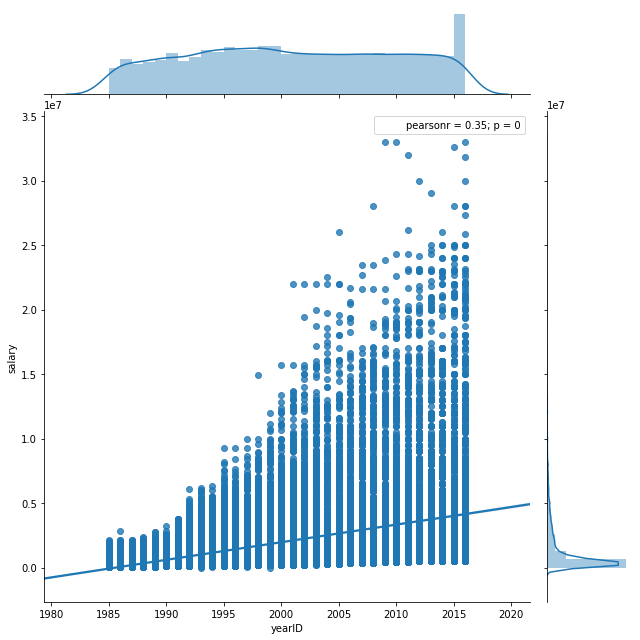

In [10]:
# Another View:
fig = plt.figure(figsize=(14,14))
axs = sns.jointplot("yearID", "salary", data=salaries, kind="reg", size=9)

### Make a column for World Series Win.
 (To be used for comparison later.)

In [11]:
salaries['WS'] = 0

In [12]:
salaries.head(5)

,yearID,teamID,lgID,playerID,salary,WS
0,1985,ATL,NL,barkele01,870000,0
1,1985,ATL,NL,bedrost01,550000,0
2,1985,ATL,NL,benedbr01,545000,0
3,1985,ATL,NL,campri01,633333,0
4,1985,ATL,NL,ceronri01,625000,0


# Now need to make WS = 1 for the teams that Won WS each year!

In [13]:
salaries['teamID'].unique()

array(['ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN', 'CLE', 'DET',
       'HOU', 'KCA', 'LAN', 'MIN', 'ML4', 'MON', 'NYA', 'NYN', 'OAK',
       'PHI', 'PIT', 'SDN', 'SEA', 'SFN', 'SLN', 'TEX', 'TOR', 'COL',
       'FLO', 'ANA', 'ARI', 'MIL', 'TBA', 'LAA', 'WAS', 'MIA', 'CHC',
       'CHW', 'KCR', 'LAD', 'NYM', 'NYY', 'SDP', 'SFG', 'STL', 'TBR', 'WSN'], dtype=object)

In [14]:
salaries['yearID'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

List of Year: Winning Teams.
1985: KCR
1986: NYN
1987: MIN
1988: LAD
1989: OAK
1990: CIN
1991: MIN
1992: TOR
1993: TOR
1995: ATL
1996: NYA
1997: FLO
1998: NYA
1999: NYA
2000: NYA
2001: ARI
2002: LAA
2003: FLO
2004: BOS
2005: CHW
2006: STL
2007: BOS
2008: PHI
2009: NYA
2010: SFG
2011: STL
2012: SFG
2013: BOS
2014: SFG
2015: KCR
2016: CHC

In [15]:
# Step 1: Find the Row Index for each Winning Team each Year...
salaries[(salaries['teamID'] == 'KCA') & (salaries['yearID'] == 1985)]

,yearID,teamID,lgID,playerID,salary,WS
222,1985,KCA,AL,balbost01,205000,0
223,1985,KCA,AL,beckwjo01,358000,0
224,1985,KCA,AL,blackbu02,465000,0
225,1985,KCA,AL,brettge01,1000000,0
226,1985,KCA,AL,conceon01,250000,0
227,1985,KCA,AL,gubicma01,115000,0
228,1985,KCA,AL,jacksda02,95000,0
229,1985,KCA,AL,jonesly01,202500,0
230,1985,KCA,AL,jonesmi02,100000,0
231,1985,KCA,AL,lampde01,535000,0


In [16]:
# Step 2: Make WS = 1 for those Rows...
salaries.loc[222:243, 'WS'] = 1 

In [17]:
# Used to check to make sure steps work...
#salaries.loc[222:243]

In [18]:
salaries[(salaries['teamID'] == 'NYN') & (salaries['yearID'] == 1986)]
salaries.loc[1010:1037, 'WS'] = 1 

In [19]:
salaries[(salaries['teamID'] == 'MIN') & (salaries['yearID'] == 1987)]
salaries.loc[1602:1610, 'WS'] = 1 

In [20]:
salaries[(salaries['teamID'] == 'LAN') & (salaries['yearID'] == 1988)]
salaries.loc[2194:2223, 'WS'] = 1 

In [21]:
salaries[(salaries['teamID'] == 'OAK') & (salaries['yearID'] == 1989)]
salaries.loc[3044:3068, 'WS'] = 1 

In [22]:
salaries[(salaries['teamID'] == 'CIN') & (salaries['yearID'] == 1990)]
salaries.loc[3487:3520, 'WS'] = 1 

In [23]:
salaries[(salaries['teamID'] == 'MIN') & (salaries['yearID'] == 1991)]
salaries.loc[4483:4506, 'WS'] = 1 

In [24]:
salaries[(salaries['teamID'] == 'TOR') & (salaries['yearID'] == 1992)]
salaries.loc[5574:5609, 'WS'] = 1 

In [25]:
salaries[(salaries['teamID'] == 'TOR') & (salaries['yearID'] == 1993)]
salaries.loc[6500:6532, 'WS'] = 1 

In [26]:
salaries[(salaries['teamID'] == 'ATL') & (salaries['yearID'] == 1995)]
salaries.loc[7417:7445, 'WS'] = 1 

In [27]:
salaries[(salaries['teamID'] == 'NYA') & (salaries['yearID'] == 1996)]
salaries.loc[8954:8987, 'WS'] = 1 

In [28]:
salaries[(salaries['teamID'] == 'FLO') & (salaries['yearID'] == 1997)]
salaries.loc[9657:9687, 'WS'] = 1 

In [29]:
salaries[(salaries['teamID'] == 'NYA') & (salaries['yearID'] == 1998)]
salaries.loc[10861:10892, 'WS'] = 1 

In [30]:
salaries[(salaries['teamID'] == 'NYA') & (salaries['yearID'] == 1999)]
salaries.loc[11867:11895, 'WS'] = 1 

In [31]:
salaries[(salaries['teamID'] == 'NYA') & (salaries['yearID'] == 2000)]
salaries.loc[12773:12800, 'WS'] = 1 

In [32]:
salaries[(salaries['teamID'] == 'ARI') & (salaries['yearID'] == 2001)]
salaries.loc[13129:13156, 'WS'] = 1 

In [33]:
salaries[(salaries['teamID'] == 'ANA') & (salaries['yearID'] == 2002)]
salaries.loc[13959:13986, 'WS'] = 1 

In [34]:
salaries[(salaries['teamID'] == 'FLO') & (salaries['yearID'] == 2003)]
salaries.loc[15109:15138, 'WS'] = 1 

In [35]:
salaries[(salaries['teamID'] == 'BOS') & (salaries['yearID'] == 2004)]
salaries.loc[15744:15773, 'WS'] = 1 

In [36]:
salaries[(salaries['teamID'] == 'CHA') & (salaries['yearID'] == 2005)]
salaries.loc[16571:16597, 'WS'] = 1 

In [37]:
salaries[(salaries['teamID'] == 'SLN') & (salaries['yearID'] == 2006)]
salaries.loc[17971:17997, 'WS'] = 1 

In [38]:
salaries[(salaries['teamID'] == 'BOS') & (salaries['yearID'] == 2007)]
salaries.loc[18196:18223, 'WS'] = 1 

In [39]:
salaries[(salaries['teamID'] == 'PHI') & (salaries['yearID'] == 2008)]
salaries.loc[19523:19550, 'WS'] = 1 

In [40]:
salaries[(salaries['teamID'] == 'NYA') & (salaries['yearID'] == 2009)]
salaries.loc[20266:20291, 'WS'] = 1 

In [41]:
salaries[(salaries['teamID'] == 'SFN') & (salaries['yearID'] == 2010)]
salaries.loc[21285:21312, 'WS'] = 1 

In [42]:
salaries[(salaries['teamID'] == 'SLN') & (salaries['yearID'] == 2011)]
salaries.loc[22151:22177, 'WS'] = 1 

In [43]:
salaries[(salaries['teamID'] == 'SFN') & (salaries['yearID'] == 2012)]
salaries.loc[22972:23001, 'WS'] = 1 

In [44]:
salaries[(salaries['teamID'] == 'BOS') & (salaries['yearID'] == 2013)]
salaries.loc[23224:23252, 'WS'] = 1 

In [45]:
salaries[(salaries['teamID'] == 'SFN') & (salaries['yearID'] == 2014)]
salaries.loc[24598:24625, 'WS'] = 1 

In [46]:
salaries[(salaries['teamID'] == 'KCA') & (salaries['yearID'] == 2015)]
salaries.loc[25060:25086, 'WS'] = 1 

In [47]:
salaries[(salaries['teamID'] == 'CHC') & (salaries['yearID'] == 2016)]
salaries.loc[25688:25716, 'WS'] = 1 

### Now some plots

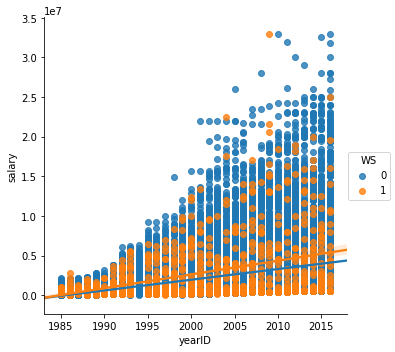

In [48]:
ax = sns.lmplot(x='yearID', y='salary', hue='WS', data=salaries, ) 

### Here we can see that WS Winners are paid more than the rest.
* Notice there are NO WS winners for 1994; this was the player Strike year, no World Series!

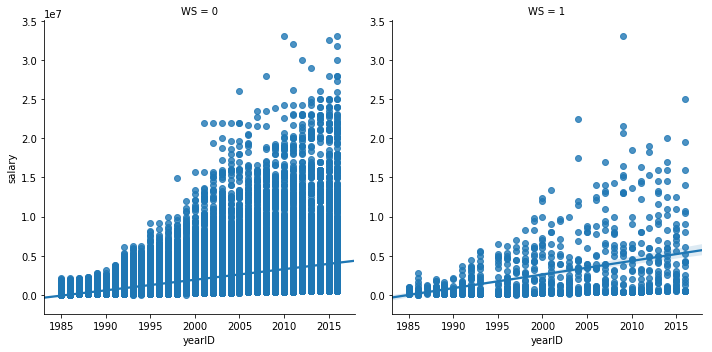

In [49]:
# Side by Side:
ax112 = sns.lmplot(x='yearID', y='salary', col='WS', data=salaries)

### Correlation

In [50]:
salaries.corr()

# There is no correlation.

,yearID,salary,WS
yearID,1.000000,0.351740,0.000855
salary,0.351740,1.000000,0.036708
WS,0.000855,0.036708,1.000000


### Pickle when ready

In [51]:

salaries.to_pickle('data/salaries.p')